In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar los datos
data = pd.read_csv('House_Pricing.csv')

# Inspeccionamos los datos para ver si debemos trabajarla previemente
print(data.info())
print(data.isnull().sum())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Tratamos los datos faltantes
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
print(data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


/tmp/ipykernel_176/3088364494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)


In [18]:
# Eliminar duplicados y después verificamos cuantos datos duplucados teníamos
data.drop_duplicates(inplace=True)
# Contamos el número de filas después de eliminar duplicados (Original 1460)
filas_despues = len(data)
print(f"Número de filas después de eliminar duplicados: {filas_despues}")

Número de filas después de eliminar duplicados: 1460


## 1
**Verifica por medio de pruebas analíticas y visuales como es la distribución de las diferentes variables númericas que se encuentran en el dataset como “Salesprice”, “GrLivArea”, “'2ndFlrSF”. Calculando algunas métricas importantes como la media, la desviación estándar y sus cuártiles.**

Estadísticas descriptivas:
            SalePrice    GrLivArea     2ndFlrSF        LotArea  TotalBsmtSF  \
count    1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean   180921.195890  1515.463699   346.992466   10516.828082  1057.429452   
std     79442.502883   525.480383   436.528436    9981.264932   438.705324   
min     34900.000000   334.000000     0.000000    1300.000000     0.000000   
25%    129975.000000  1129.500000     0.000000    7553.500000   795.750000   
50%    163000.000000  1464.000000     0.000000    9478.500000   991.500000   
75%    214000.000000  1776.750000   728.000000   11601.500000  1298.250000   
max    755000.000000  5642.000000  2065.000000  215245.000000  6110.000000   

          1stFlrSF  OverallQual  OverallCond    YearBuilt  
count  1460.000000  1460.000000  1460.000000  1460.000000  
mean   1162.626712     6.099315     5.575342  1971.267808  
std     386.587738     1.382997     1.112799    30.202904  
min     334.000000     1.0000

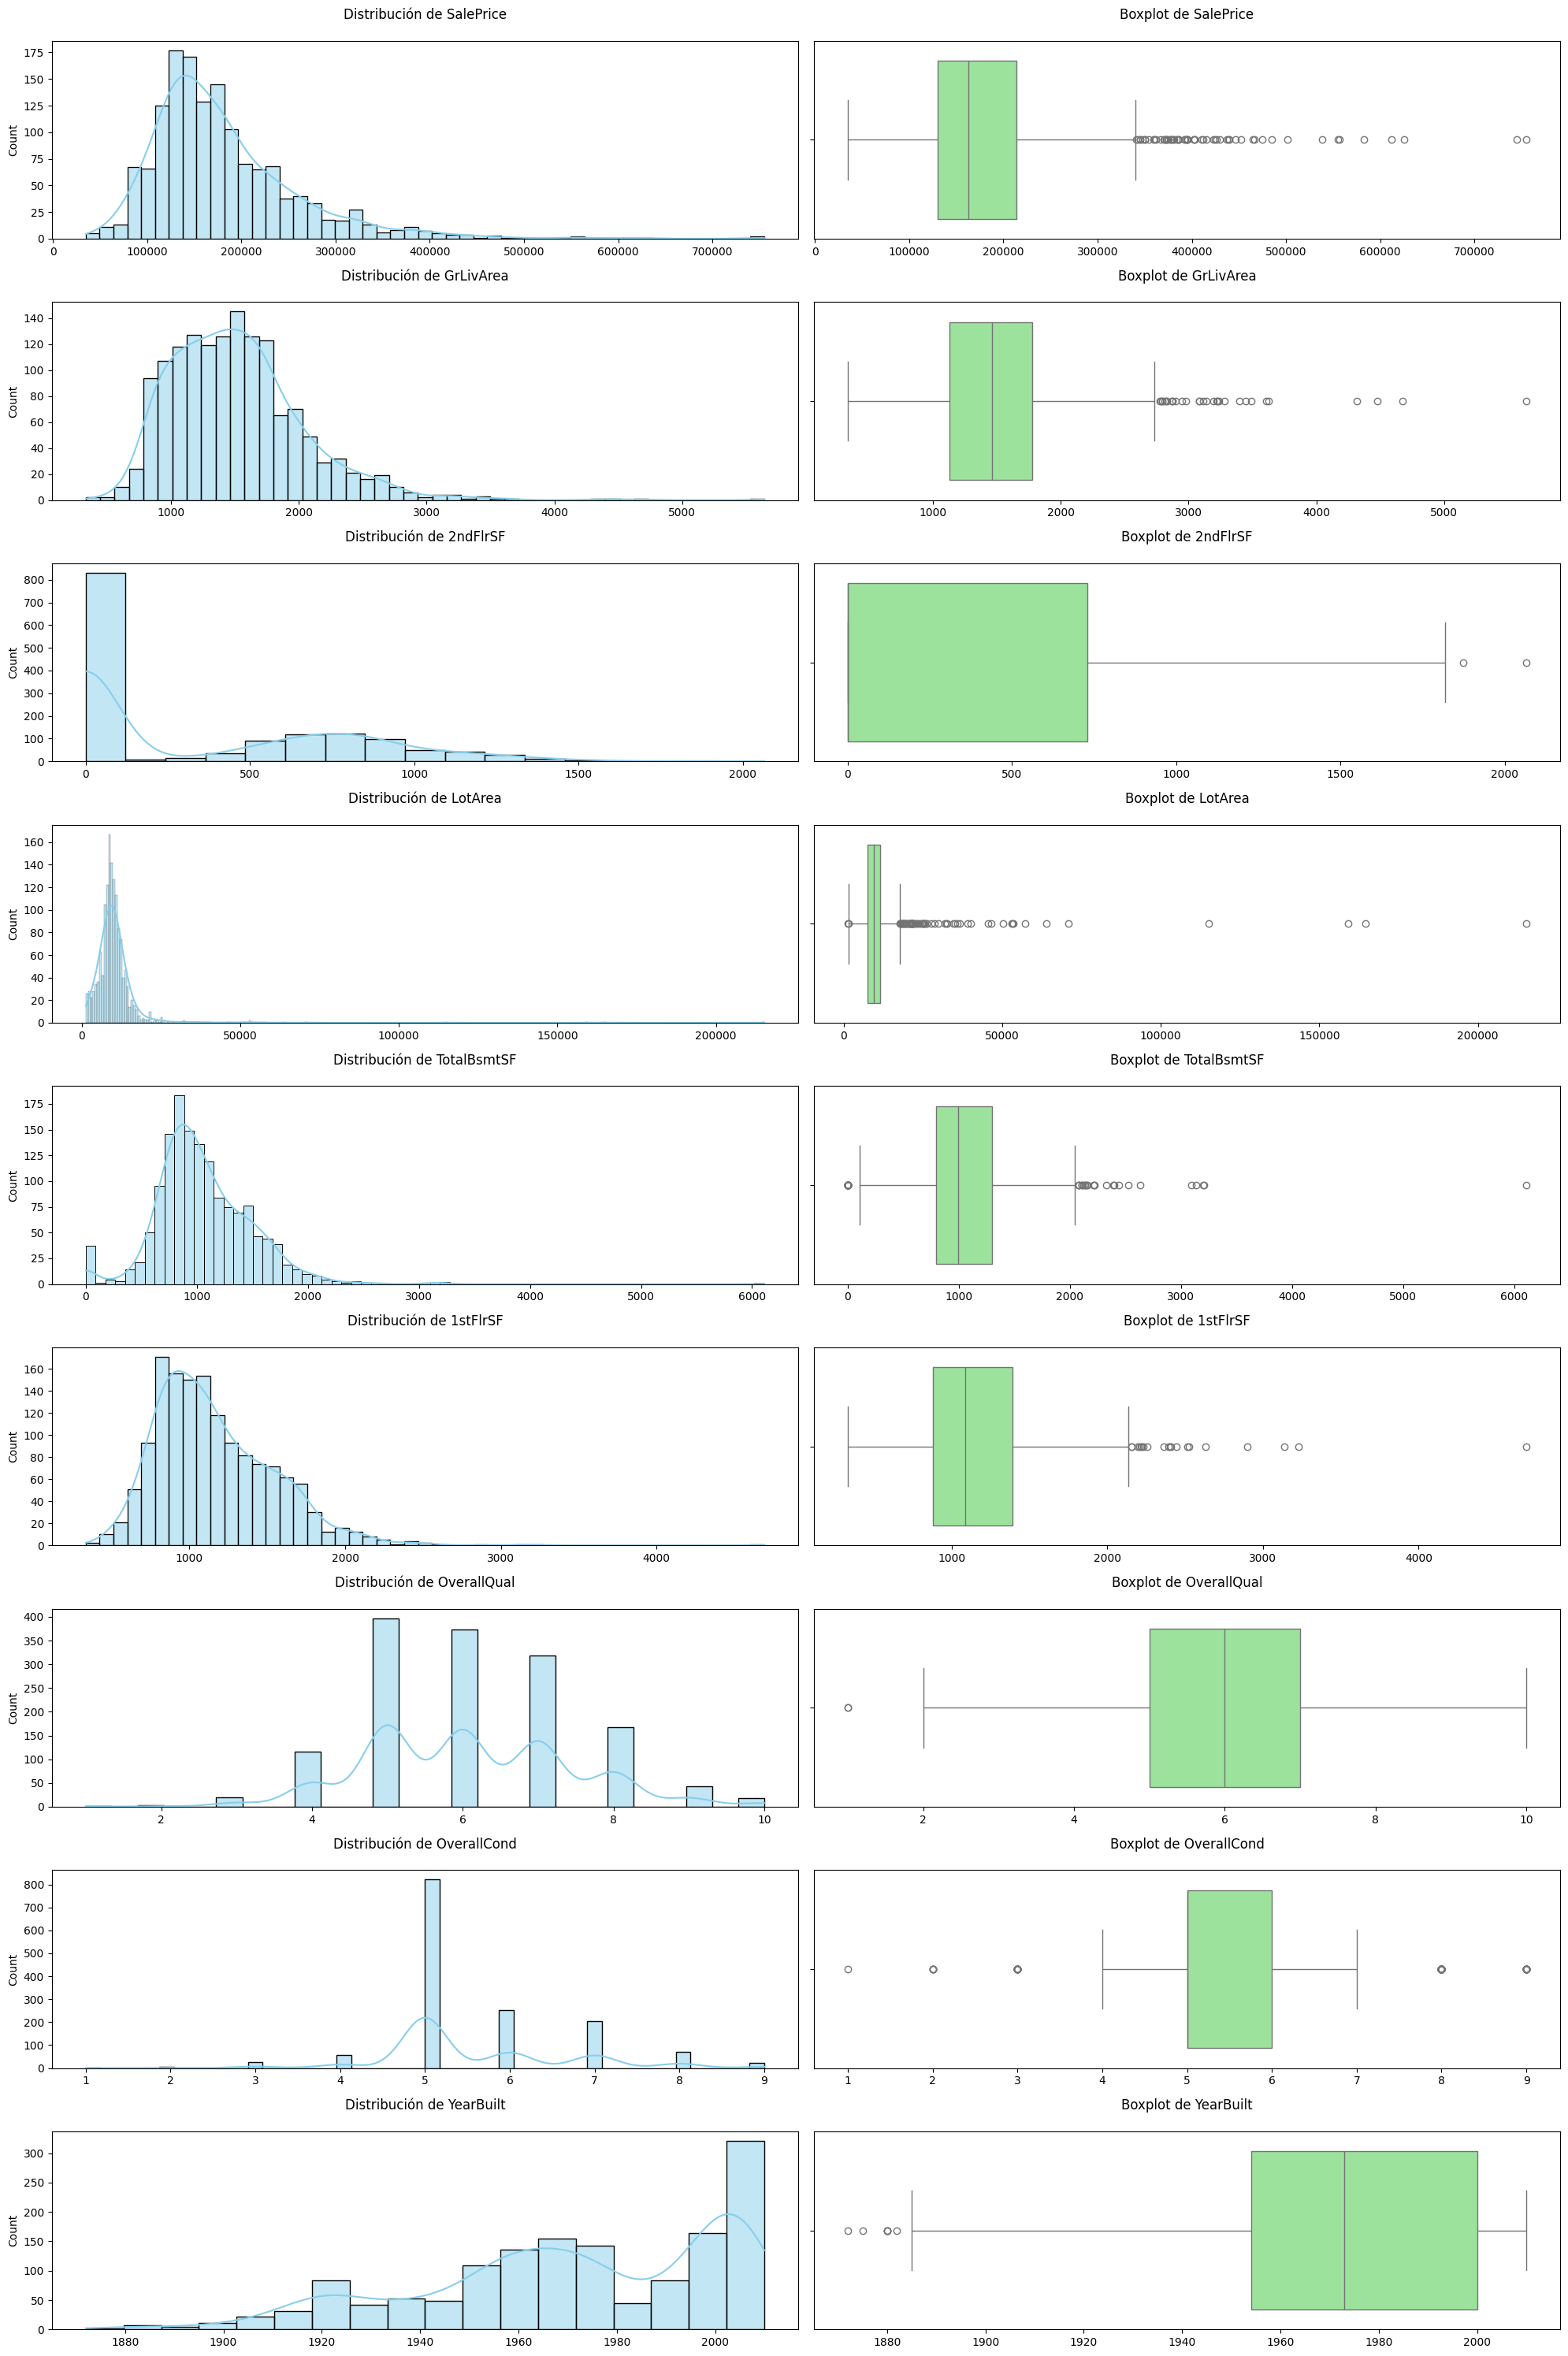

In [24]:
# Seleccionamos variables numéricas clave para la aplicación de pruebas analíticas
numeric_vars = ['SalePrice', 'GrLivArea', '2ndFlrSF', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt']

# Aplicamos estadísticas descriptivas
desc_stats = data[numeric_vars].describe()
print("Estadísticas descriptivas:\n", desc_stats)

# Configuramos la figura para mostrar histograma y boxplot lado a lado
plt.figure(figsize=(20, 30))  # Acomodamos ambos gráficos

for i, var in enumerate(numeric_vars, 1):
    # Subplot para el histograma (izquierda)
    plt.subplot(len(numeric_vars), 2, 2*i-1)
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f'Distribución de {var}', pad=20)
    plt.xlabel('')
    
    # Subplot para el boxplot (derecha)
    plt.subplot(len(numeric_vars), 2, 2*i)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}', pad=20)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Generalidades que podemos observar:**
- SalePrice: Precio de venta, con una media de 180,921 y un rango de 349,000 a 755,000.
- GrLivArea: Área del terreno, con una media de 15,464 y un rango de 334 a 5,642.
- 2ndFlrSF: Área de la segunda planta, con una media de 346,99 y un rango de 0 a 728.
- LotArea: Área del lote, con una media de 10,516 y un rango de 1,300 a 215,245.
- TotalBsmtSF: Área total del sótano, con una media de 1,057 y un rango de 0 a 6,110.
 
Las distribuciones y boxplots de las variables numéricas (SalePrice, GrLivArea, 2ndFlrSF, LotArea, TotalBsmtSF, 1stFlrSF, OverallQual, OverallCond, YearBuilt) muestran su tendencia de distribución y la presencia de outliers.

## 2
**Calcula las correlaciones entre estás variables y visualiza el resultado en un heatmap, ¿Qué variables correlacionan más con el Precio de Venta?**

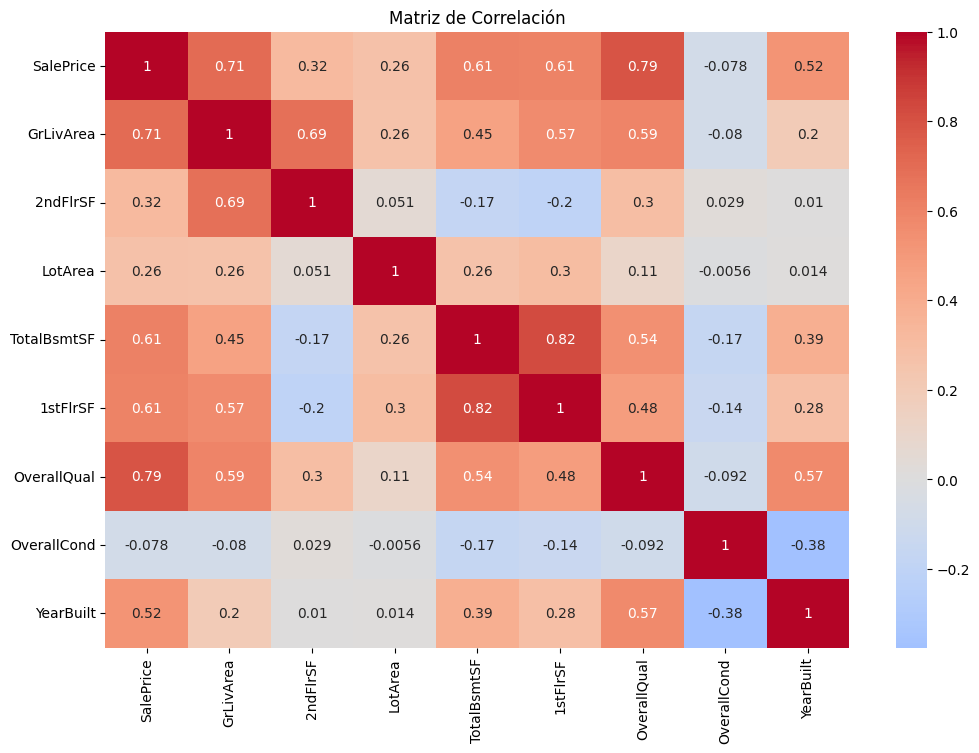


Correlaciones con SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
TotalBsmtSF    0.613581
1stFlrSF       0.605852
YearBuilt      0.522897
2ndFlrSF       0.319334
LotArea        0.263843
OverallCond   -0.077856
Name: SalePrice, dtype: float64


In [20]:
# Calculamos las correlaciones
corr_matrix = data[numeric_vars].corr()

# Generamos el Heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Variables con mayor correlación con SalePrice
print("\nCorrelaciones con SalePrice:")
print(corr_matrix['SalePrice'].sort_values(ascending=False))

**¿Qué variables correlacionan más con el Precio de Venta?** Según nuestro gráfico de corelación y nuestro resumen, podemos observar cuatro correlaciones fuertes las cuales se enuncian de mayor a menor:
- OverallQual (0.79) - Calidad general de la vivienda
- GrLivArea (0.71) - Área habitable sobre nivel
- TotalBsmtSF (0.61) - Área total del sótano
- 1stFlrSF (0.61) - Área del primer piso

## 3 
**Configura un modelo de regresión con todas las variables numéricas por medio de la función OLS de la librería sm**

## 4
**Imprime el reporte de regresión y revisa que variables son estadísticamente significativas para nuestro modelo.**

In [21]:
# Preparamos los datos para regresión
X = data[numeric_vars].drop('SalePrice', axis=1)
X = sm.add_constant(X)  # Añadimos intercepto
y = data['SalePrice']

# Generamos el Modelo OLS
model = sm.OLS(y, X).fit()
print("\nResumen del modelo OLS:")
print(model.summary())


Resumen del modelo OLS:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     620.1
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        16:03:49   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.498e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.179e+06   

**El modelo inicial con todas las variables mostró que:**
- OverallQual, GrLivArea, TotalBsmtSF y YearBuilt son altamente significativas (p < 0.001)
- Algunas variables como OverallCond no fueron significativas
- Hubo indicios de multicolinealidad (altos VIFs para variables relacionadas con área)


## 5
Por último por medio de la libería variance_inflation_factor revisa que variables presentan multicolinealidad

In [22]:
# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nFactores de Inflación de Varianza (VIF):")
print(vif_data)


Factores de Inflación de Varianza (VIF):
      Variable          VIF
0        const  8266.813859
1    GrLivArea   122.610040
2     2ndFlrSF    86.910920
3      LotArea     1.137338
4  TotalBsmtSF     3.528758
5     1stFlrSF    69.822439
6  OverallQual     2.598492
7  OverallCond     1.228538
8    YearBuilt     1.966860


**Observaciones:**

Como se vió en clase, un VIF alto (superior a 10) indica un problema potencial de multicolinealidad que puede afectar la precisión de las estimaciones en nuestro modelo. En este caso, las variables GrLivArea, 2ndFlrSF y 1stFlrSF tienen VIFs altos, podría ser necesario  excluir algunas variables, centrarlas.

## 6
Con todo el análisis anterior construye el modelo de regresión final excluyendo aquellas variables que consideres necesarias y mide el nivel de precisión del modelo por medio del error cuadratico medio y la R cuadrada. ¿Qué tan preciso fue tu modelo?

In [28]:
# Hacemos la selección de las variables basandonos en significancia estadística y multicolinealidad
selected_vars = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
X_final = data[selected_vars]
X_final = sm.add_constant(X_final)

# Modelo final
final_model = sm.OLS(y, X_final).fit()

# Métricas del modelo final
mse = np.mean((final_model.predict(X_final) - y) ** 2)
r_squared = final_model.rsquared

print("\nResumen del modelo final:")
print(final_model.summary())
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R-cuadrada: {r_squared:.4f}")


Resumen del modelo final:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1138.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        16:56:11   Log-Likelihood:                -17509.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1455   BIC:                         3.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.979e+05 

**Modelo Final**

Algunas observaciones del modelo final con las 4 variables más significativas y sin multicolinealidad:
- Obtuvimos R-squared (0.758) y Adj. R-squared (0.757) indican que aproximadamente el 76% de la variabilidad en el precio de venta se explica con las variables incluidas en el modelo. Esto es un buen indicador, pero no mejoró al anterior que era de 0.774.
- El F-statistic es 1138 con una probabilidad de 0.00 (El anterior obtenido fué de 620.1), lo que es extremadamente bajo. Esto indica que al menos una de las variables incluidas en el modelo tiene una correlación significativa con el precio de venta.
- Todas las variables (OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF, YearBuilt) tienen p-valores menores a 0.05, lo que significa que son estadísticamente significativas a nivel de confianza del 95%. Esto indica que estas variables afectan significativamente el precio de venta.
- Ahora el error cuadrático medio (MSE) de 1527145740.54 nos indica que, en promedio, las predicciones del modelo difieren de los precios reales, para tener una mejor unetrpretación sacamos su raíz y podemos decir que en promedio nos alejamos 39,078.71 del precio real.